In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("facebook-wall.txt", "r") as file:
    data = np.array([[int(s) for s in line.split("\t")] for line in file.readlines()])

In [3]:
nodes = np.unique(data[:, :2])

graph = nx.DiGraph()
for i in nodes:
    graph.add_node(i)
for i, j in data[data[:, 0] != data[:, 1]][:, :2]:
    graph.add_edge(i, j)

in_degrees = np.vectorize(graph.in_degree)(nodes)
out_degrees = np.vectorize(graph.out_degree)(nodes)

In [45]:
def histogram(x: np.ndarray, hist_ax, ccdf_ax):
    counts, bin_edges = np.histogram(in_degrees, x.max(), (0, x.max()))
    cum_counts = 1 - np.cumsum(counts) / counts.sum()
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    hist_ax.scatter(bin_centers, counts, marker=".")
    ccdf_ax.plot(bin_centers, cum_counts, marker="", drawstyle="steps-post")
    for ax in [hist_ax, ccdf_ax]:
        ax.set_yscale("log")
        ax.set_xscale("log")

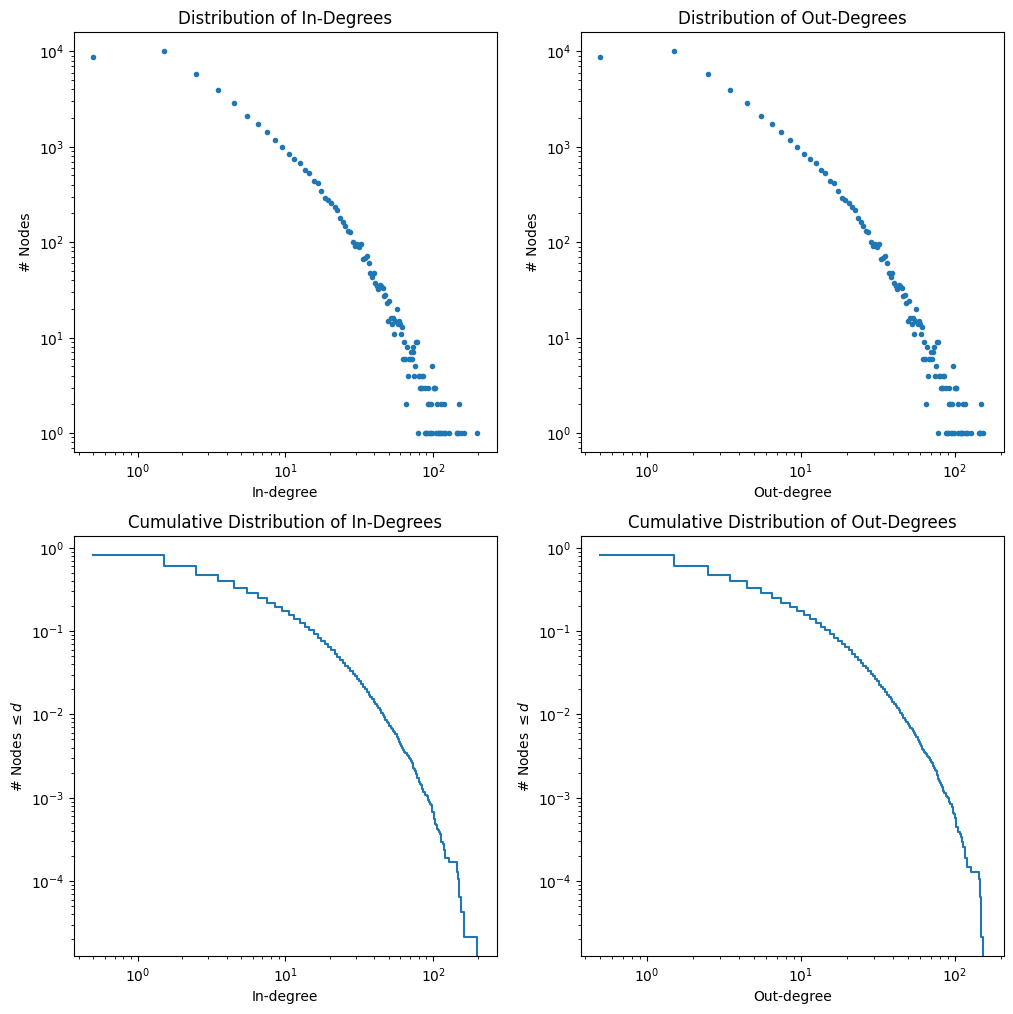

In [46]:
fig, ((ax_in, ax_out), (ax_in_ccdf, ax_out_ccdf)) = plt.subplots(2, 2)
fig.set_figwidth(12)
fig.set_figheight(12)
for (hist_ax, ccdf_ax), data, what in [
    ((ax_in, ax_in_ccdf), in_degrees, "In"),
    ((ax_out, ax_out_ccdf), out_degrees, "Out"),
]:
    hist_ax.set_title(f"Distribution of {what}-Degrees")
    hist_ax.set_xlabel(f"{what}-degree")
    hist_ax.set_ylabel(f"# Nodes")
    ccdf_ax.set_title(f"Cumulative Distribution of {what}-Degrees")
    ccdf_ax.set_xlabel(f"{what}-degree")
    ccdf_ax.set_ylabel(rf"# Nodes $\leq d$")
    histogram(data, hist_ax, ccdf_ax)
plt.show()